In [48]:
import pandas as pd
import numpy as np
import random
import sys
import matplotlib.pyplot as plt

In [33]:
# input = {'d_rep':[2,1,2], 't':[5,10,7]}
# index = [1,2,3]
# dados = pd.DataFrame(data=input, index=index)

rep_cycle_hengelson = [7,2,7,7,7,2,2,5,6,5,6,5,6,1,6,4,3,4,3,4]
rep_cycle_tgs = [7,6,4,5,2,2,3,7,6,4,5,1,7,6,4,3,2,5,7,6]
rep_cycle_own = [7,6,4,5,7,2,6,5,4,7,2,6,3,4,1,5,7,2,6,3]

rep_cycle_full = 2*rep_cycle_hengelson

data = {0:[718, 723.5, 662.6, 701.7, 714.2, 748.3, 655.1],
        1:[591, 546.7, 540, 603.6, 522.7, 609.1, 580.3], 
        2:[741, 745.5, 699.7, 766.5, 753.3, 590.1, 714.8], 
        3:[769, 702.1, 644.6, 783.7, 756.3, 682.4, 730.2], 
        4:[748, 746.1, 709.5, 789.6, 648.1, 692.5, 730.9]}

dados = pd.DataFrame(data=data, index=[1,2,3,4,5,6,7])

In [3]:
arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
df = pd.DataFrame(index=range(5), columns=index)

In [6]:
def gen_gannt(seq):
    rep_cycle_full = seq*2
    stations_list = range(5)
    
    arrays = [range(len(rep_cycle_full)), ['Inicio', 'Fim']]
    index = pd.MultiIndex.from_product(arrays, names=['Pos', 'state'])
    df = pd.DataFrame(index=range(5), columns=index)
    
    for station in stations_list:
        if station == 0:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = 0
                    df.loc[station, (i, 'Fim')] = dados.loc[j, station]
                else:
                    df.loc[0, (i, 'Inicio')] = df.loc[0, (i-1, 'Fim')]
                    df.loc[0, (i, 'Fim')] = df.loc[0, (i, 'Inicio')] + dados.loc[j, station]
        else:
            for i,j in enumerate(rep_cycle_full):
                if i == 0:
                    df.loc[station, (i, 'Inicio')] = df.loc[station-1, (i, 'Fim')]
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]
                else:
                    df.loc[station, (i, 'Inicio')] = max([df.loc[station-1, (i, 'Fim')],df.loc[station, (i-1, 'Fim')]])
                    df.loc[station, (i, 'Fim')] = df.loc[station, (i, 'Inicio')] + dados.loc[j, station]

    return df

gen_gannt(rep_cycle)

Pos        0               1               2               3               4   \
state  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0           0   655.1   655.1  1378.6  1378.6  2033.7  2033.7  2688.8  2688.8   
1       655.1  1235.4  1378.6  1925.3  2033.7    2614  2688.8  3269.1  3343.9   
2      1235.4  1950.2  1950.2  2695.7  2695.7  3410.5  3410.5  4125.3  4125.3   
3      1950.2  2680.4  2695.7  3397.8  3410.5  4140.7  4140.7  4870.9  4870.9   
4      2680.4  3411.3  3411.3  4157.4  4157.4  4888.3  4888.3  5619.2  5619.2   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3343.9  ...  24719.7  25421.4  25421.4    26084    26084  26785.7   
1      3924.2  ...  25421.4    26025    26084    26624  26785.7  27389.3   
2      4840.1  ...  26105.9  26872.4  26872.4  27572.1  27572.1  28338.6   
3      5601.1  ...  27286.8  28070.5  28070.5  28715.1  28715.1  29498.8   
4      6350.1  ...  28070.5  28860.1  28860.1  29569.6  29569.6  30359.2   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26785.7  27448.3  27448.3    28150  
1      27448.3  27988.3    28150  28753.6  
2      28338.6  29038.3  29038.3  29804.8  
3      29498.8  30143.4  30143.4  30927.1  
4      30359.2  31068.7  31068.7  31858.3  

[5 rows x 80 columns]

In [16]:
tarefasOrder = []
possibleNumbers = []

for i in range (0,1000):  
    partial_list = []
    l1 = 1
    l2 = 3
    l3 = 2
    l4 = 3
    l5 = 3
    l6 = 4
    l7 = 4
    nextNumber = ''
    for j in range (0,20):
        possibleNumbers = []
        if l1>=1:
            possibleNumbers.append(1)
        if l2>=1:
            possibleNumbers.append(2)
        if l3>=1:
            possibleNumbers.append(3)
        if l4>=1:
            possibleNumbers.append(4)
        if l5>=1:
            possibleNumbers.append(5)
        if l6>=1:
            possibleNumbers.append(6)
        if l7>=1:
            possibleNumbers.append(7)

        nextNumber = random.choice(possibleNumbers)

        if(nextNumber==1):
            l1=l1-1
        if(nextNumber==2):
            l2=l2-1
        if(nextNumber==3):
            l3=l3-1
        if(nextNumber==4):
            l4=l4-1
        if(nextNumber==5):
            l5=l5-1
        if(nextNumber==6):
            l6=l6-1
        if(nextNumber==7):
            l7=l7-1
        partial_list.append(nextNumber)
    tarefasOrder.append(partial_list)

    print(tarefasOrder)
#     tarefasOrder.clear()

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [23]:
dic = {}
for i,j in enumerate(tarefasOrder):
    dic[i] = (gen_gannt(j),j)
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [27]:
dic[750][0]

Pos        0               1               2               3               4   \
state  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio     Fim  Inicio   
0           0   723.5   723.5  1425.2  1425.2  2139.4  2139.4    2802    2802   
1       723.5  1270.2  1425.2  2028.8  2139.4  2662.1    2802    3342  3525.5   
2      1270.2  2015.7  2028.8  2795.3  2795.3  3548.6  3548.6  4248.3  4248.3   
3      2015.7  2717.8  2795.3    3579    3579  4335.3  4335.3  4979.9  4993.8   
4      2717.8  3463.9    3579  4368.6  4368.6  5016.7  5016.7  5726.2  5726.2   

Pos            ...       35                36                37           \
state     Fim  ...   Inicio      Fim   Inicio      Fim   Inicio      Fim   
0      3525.5  ...  24501.7  25156.8  25156.8  25905.1  25905.1  26653.4   
1      4072.2  ...  25156.8  25737.1  25905.1  26514.2  26653.4  27262.5   
2      4993.8  ...  26519.9  27234.7  27234.7  27824.8  27824.8  28414.9   
3      5695.9  ...  27578.5  28308.7  28308.7  28991.1  28991.1  29673.5   
4      6472.3  ...  28412.7  29143.6  29143.6  29836.1  29836.1  30528.6   

Pos         38                39           
state   Inicio      Fim   Inicio      Fim  
0      26653.4  27401.7  27401.7    28150  
1      27401.7  28010.8    28150  28759.1  
2      28414.9    29005    29005  29595.1  
3      29673.5  30355.9  30355.9  31038.3  
4      30528.6  31221.1  31221.1  31913.6  

[5 rows x 80 columns]

In [94]:
def calc_metric(gannt):
    ideal_full_cycle = 722*40
    return (gannt.loc[4, (39, 'Fim')]/ideal_full_cycle)-1

hengelson_metric = calc_metric(gen_gannt(rep_cycle_hengelson))
tgs_metric = calc_metric(gen_gannt(rep_cycle_tgs))
own_metric = calc_metric(gen_gannt(rep_cycle_own))
work_metrics = [hengelson_metric, own_metric, tgs_metric]

metrics = []
for i in dic.keys():
    metrics.append(calc_metric(dic[i][0]))

full_metrics = metrics + work_metrics

full_sorted_metrics = sorted(full_metrics)#.sorted()

In [95]:
hengelson_index = full_metrics.index(hengelson_metric)
tgs_index = full_metrics.index(tgs_metric)
own_index = full_metrics.index(own_metric)

Text(0.5, 0.98, 'Métrica para os 1000 sequenciamentos aleatórios')

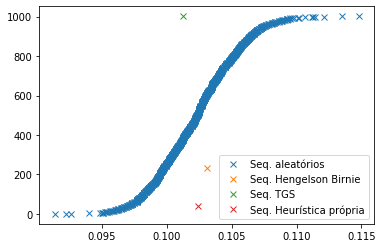

In [105]:
fig1, ax1 = plt.subplots()
ax1.plot(full_sorted_metrics,range(len(full_sorted_metrics)), 'x', label='Seq. aleatórios')
ax1.plot(hengelson_metric,hengelson_index, 'x', label='Seq. Hengelson Birnie')
ax1.plot(tgs_metric,tgs_index, 'x', label='Seq. TGS')
ax1.plot(own_metric,own_index, 'x', label='Seq. Heurística própria')
ax1.legend()
fig.suptitle('Métrica para os 1000 sequenciamentos aleatórios')

Text(0.5, 0.98, 'Distribuição de 1000 sequências')

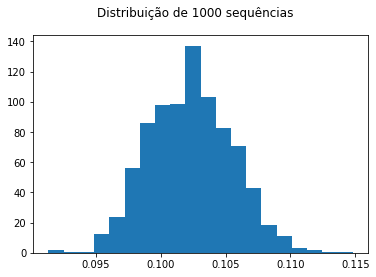

In [107]:
fig2, ax2 = plt.subplots()
ax2.hist(metrics, bins=20, density=True)#, cumulative=True)
fig2.suptitle('Distribuição de 1000 sequências')